In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math

from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


Using TensorFlow backend.


In [2]:
DATA_DIR = Path('.', 'data', 'final', 'public')

In [3]:
train_values = pd.read_csv(DATA_DIR / 'train_values.csv', index_col='building_id')
train_labels = pd.read_csv(DATA_DIR / 'train_labels.csv', index_col='building_id')

In [4]:
#print(train_values.dtypes)
s = (train_values.dtypes == 'object')
object_cols = list(s[s].index)
s = (train_values.dtypes != 'object')
number_cols = list(s[s].index)


In [5]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='building_id')

In [6]:
AGELIMIT=100

In [7]:
le = LabelEncoder()
sns_data=train_values[number_cols].copy()
for col in train_values[object_cols].columns:
    le.fit(train_values[col])
    sns_data[col]=le.transform(train_values[col])
geo_level_1_fact=math.pow(10,int(math.log(train_values['geo_level_2_id'].max(),10)+1))
geo_level_2_fact=math.pow(10,int(math.log(train_values['geo_level_3_id'].max(),10)+1))
sns_data['geo_level_n']=  train_values['geo_level_1_id']*geo_level_1_fact*geo_level_2_fact+train_values['geo_level_2_id']*geo_level_2_fact+train_values['geo_level_3_id']
sns_data['geo_level']=sns_data['geo_level_n'].astype(int).astype(str)
le = LabelEncoder()
le.fit(sns_data['geo_level'])
sns_data['geo_level_cod']=le.transform(sns_data['geo_level'])
sns_data=sns_data.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id','geo_level_n','geo_level'],axis=1)
sns_data.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,has_secondary_use_other,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,geo_level_cod
building_id,,,,,,,,,,,,,,,,,,,,,
802906,2,30,6,5,1,1,0,0,0,0,...,0,2,2,0,0,1,3,2,2,9483
28830,2,10,8,7,0,1,0,0,0,0,...,0,1,2,0,3,1,2,2,2,11143
94947,2,10,5,5,0,1,0,0,0,0,...,0,2,2,0,0,3,3,2,2,5362
590882,2,10,6,5,0,1,0,0,0,0,...,0,2,2,0,0,3,2,2,2,5886
201944,3,30,8,9,1,0,0,0,0,0,...,0,2,2,0,0,3,2,2,2,737


In [8]:
sns_data.describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,has_secondary_use_other,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,geo_level_cod
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,...,0.005119,1.695427,2.119036,0.360482,0.492481,1.226711,2.053718,2.215325,1.962318,6280.394557
std,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,...,0.071364,0.696040,0.579154,0.595595,1.028436,0.902518,0.611996,1.118290,0.314817,3414.757702
min,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,3854.000000
50%,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,6952.000000
75%,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,9378.000000
max,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,9.000000,3.000000,11594.000000


In [9]:
sns_data=train_values[number_cols].join(train_labels)
sns_data=sns_data[sns_data.age < AGELIMIT]

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


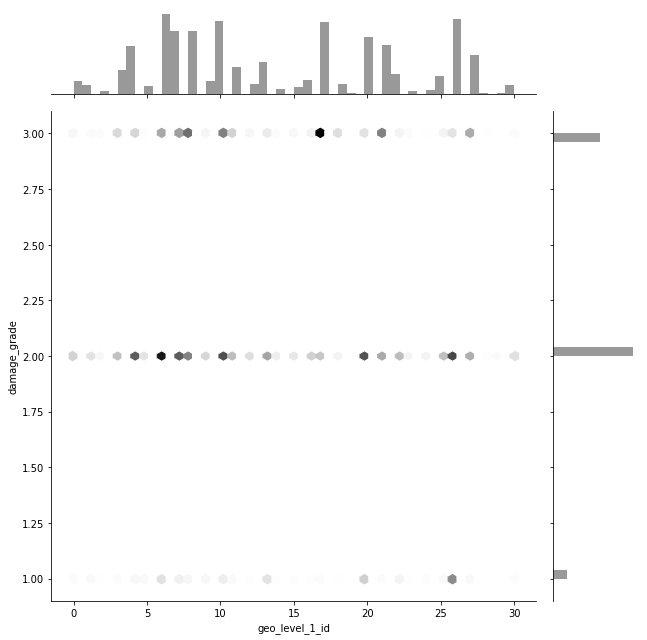

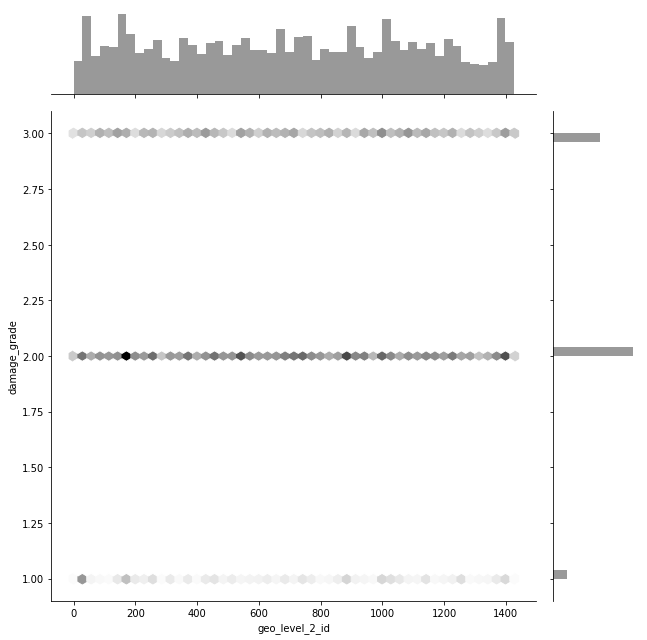

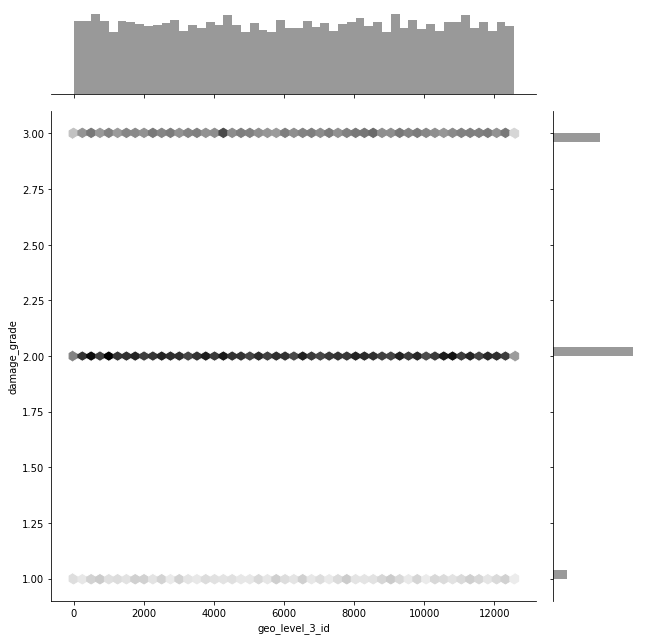

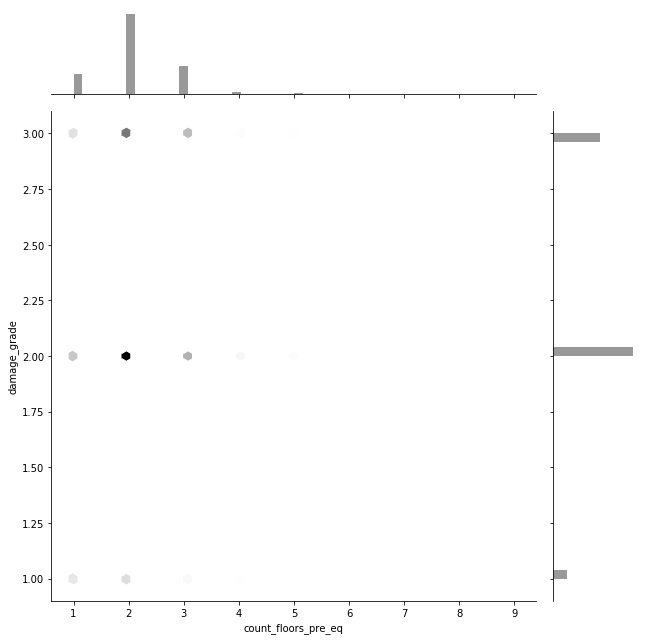

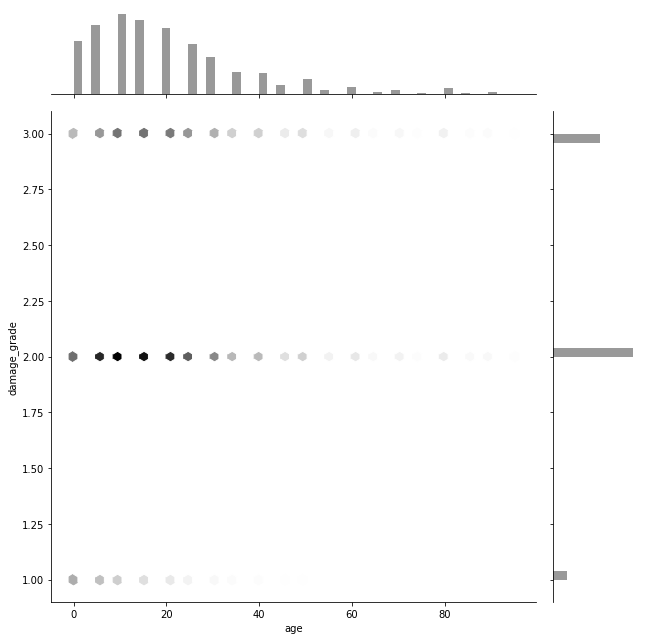

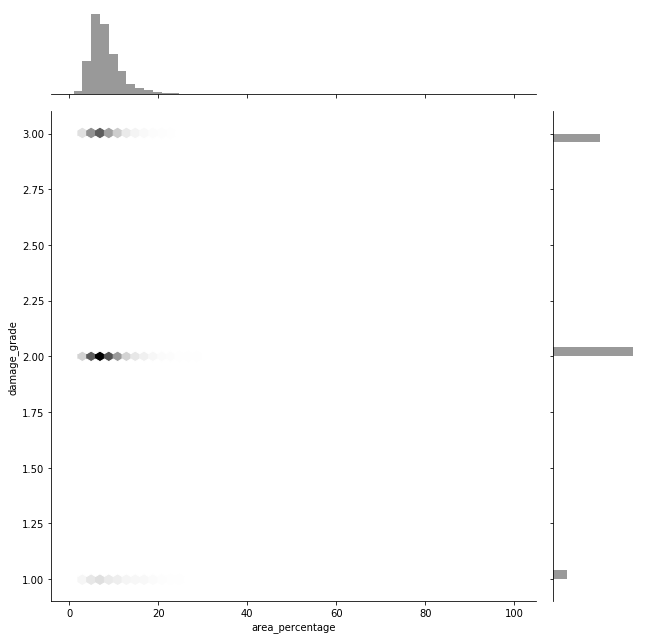

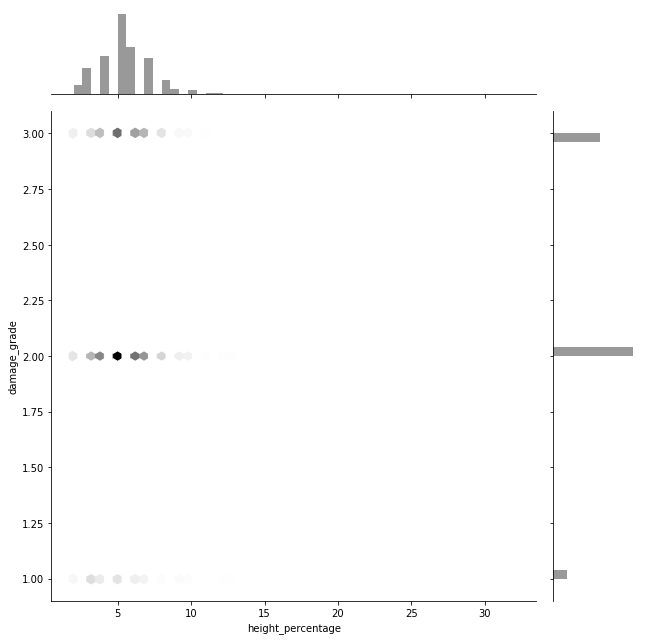

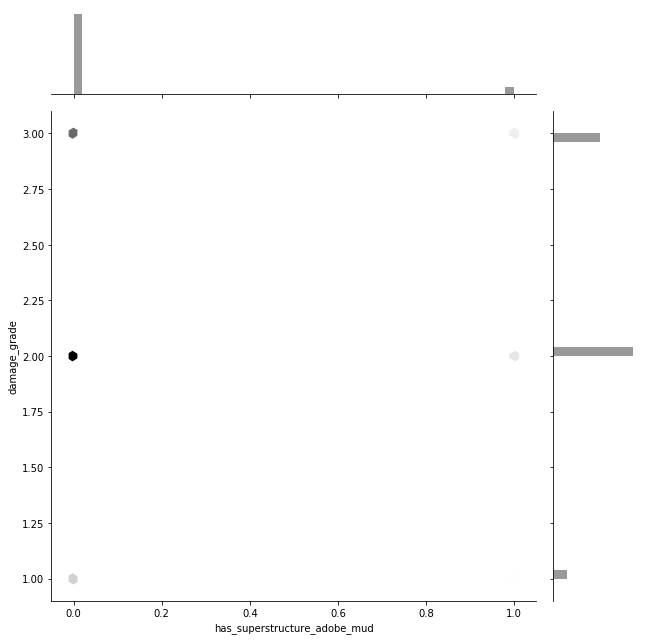

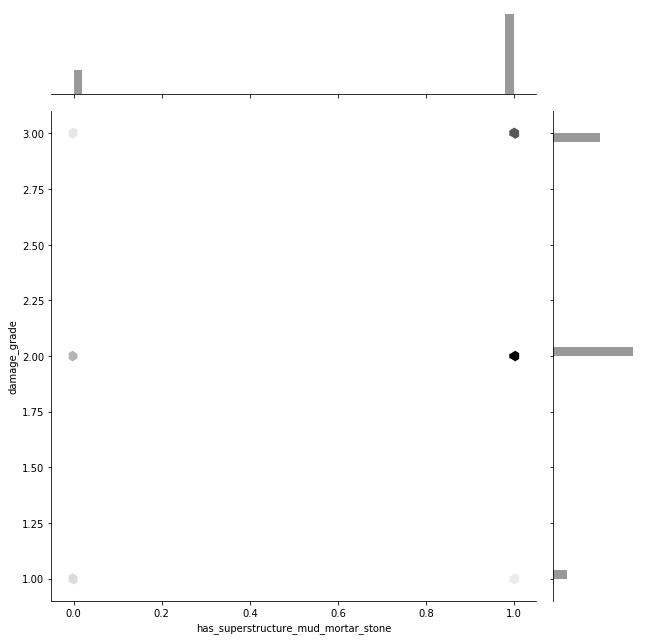

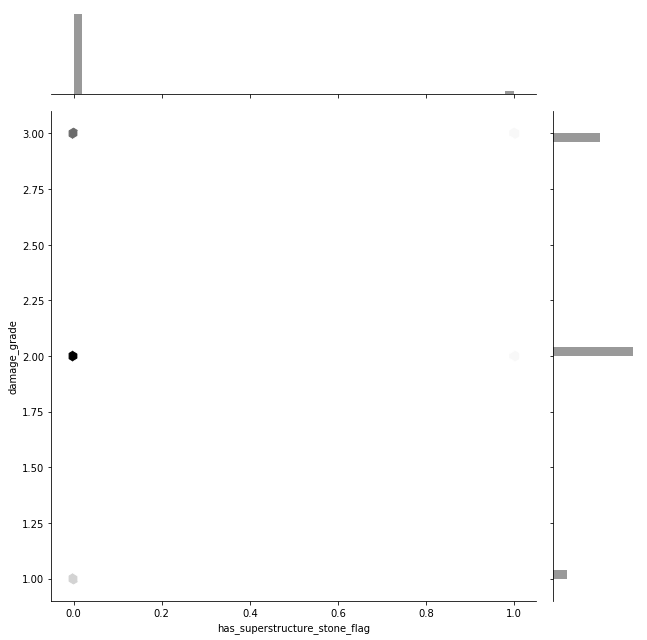

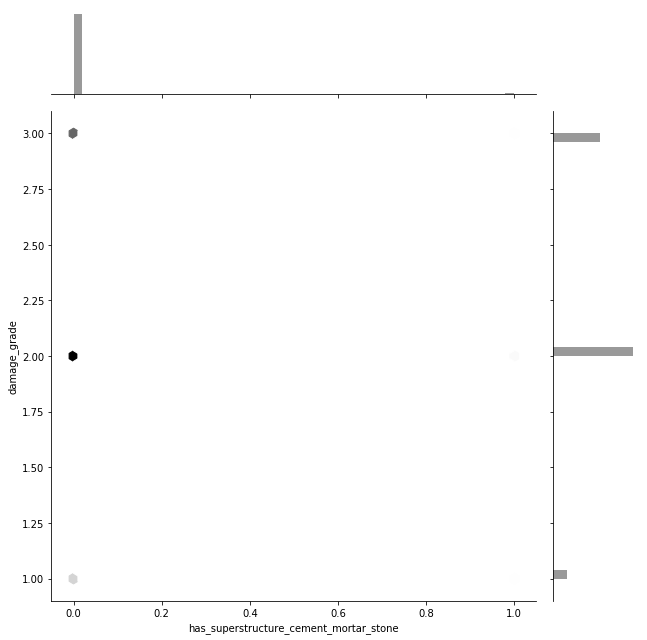

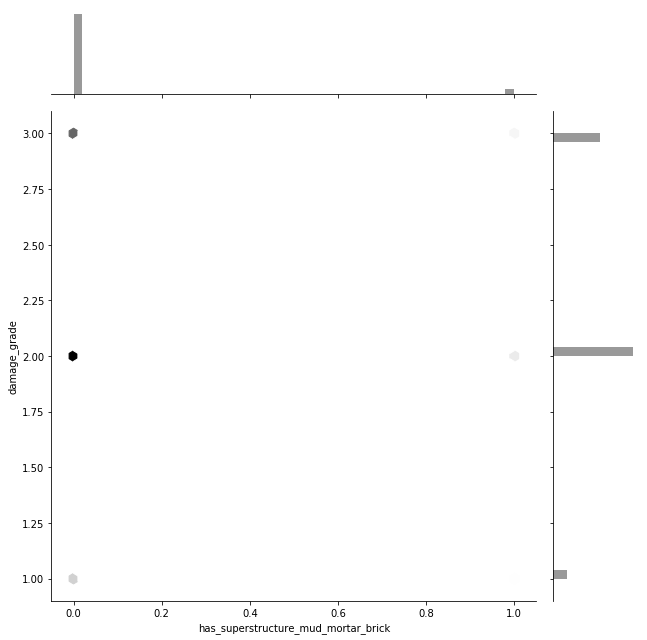

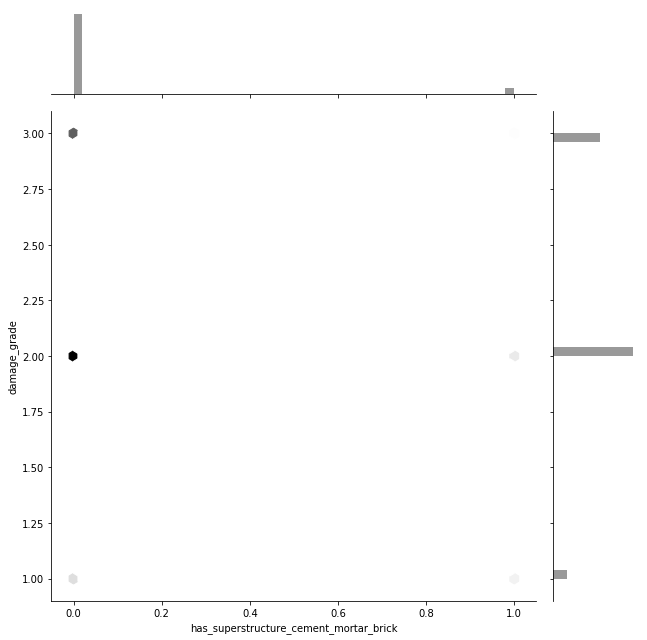

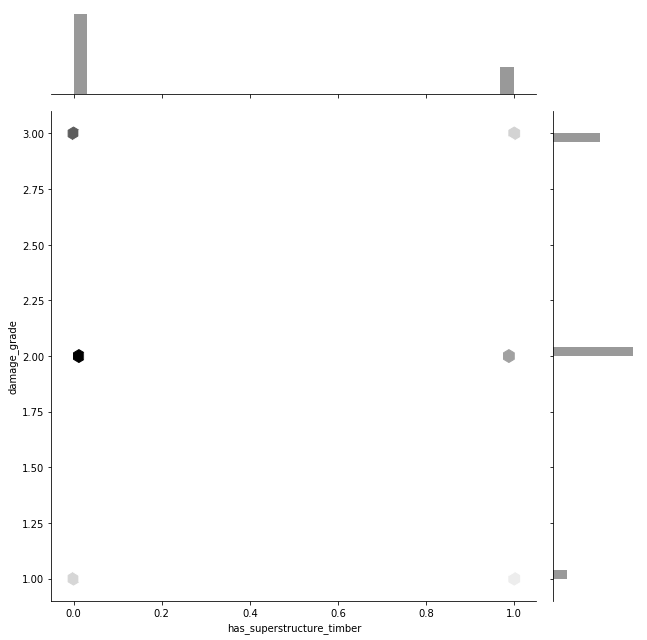

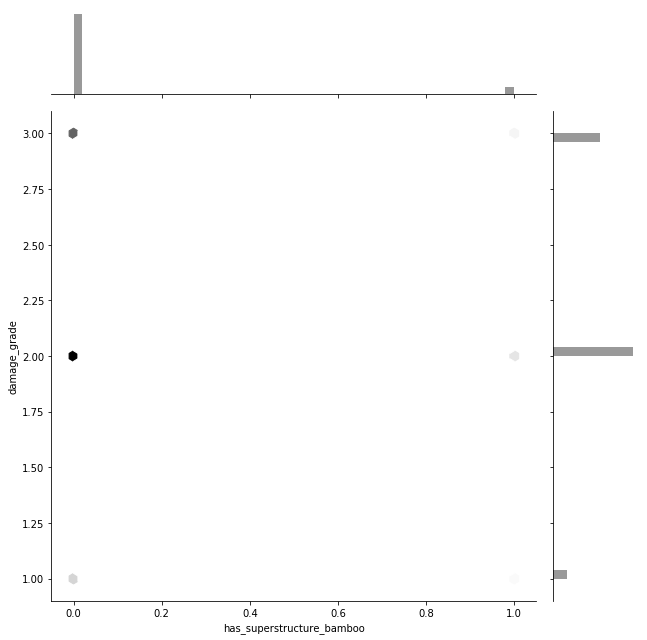

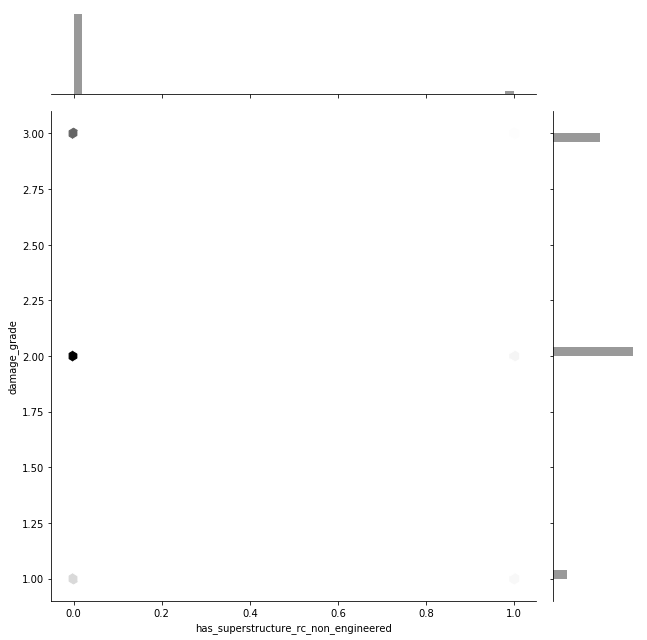

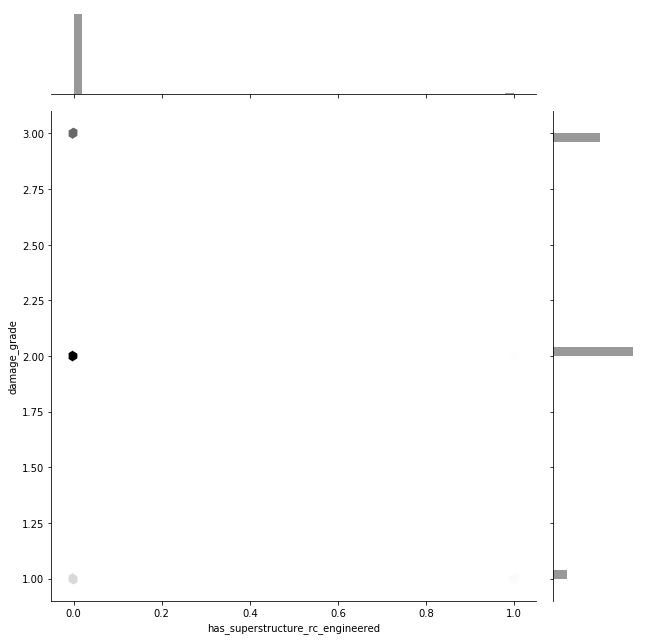

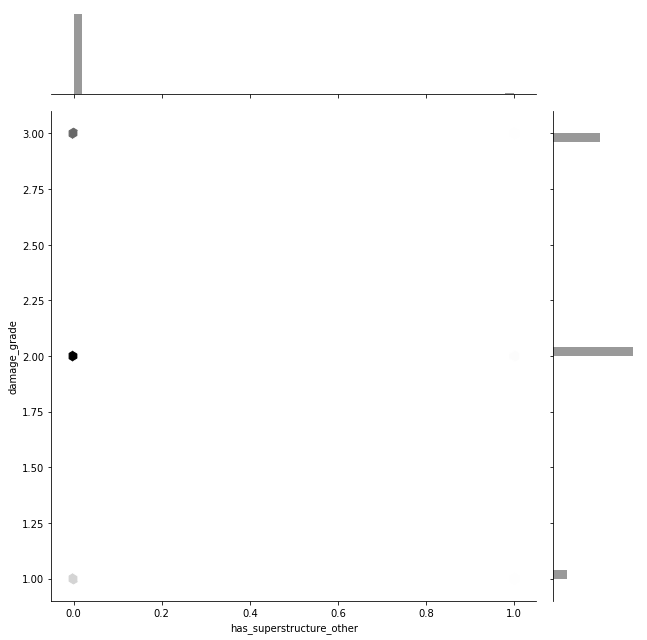

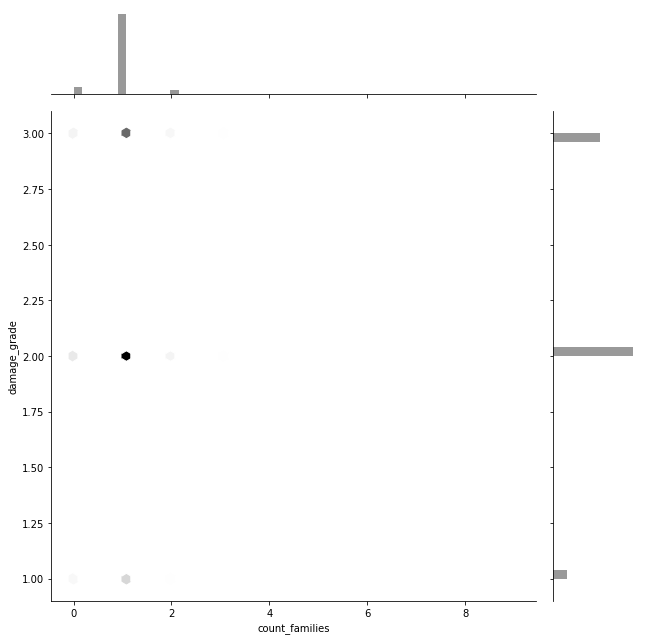

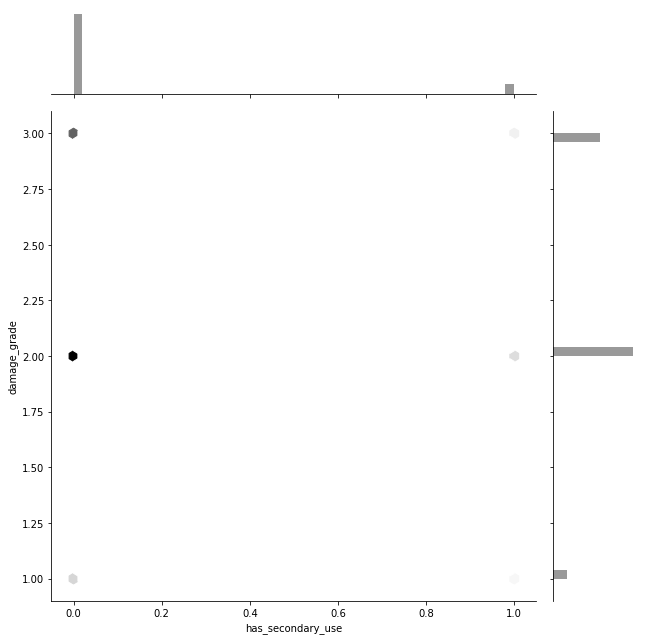

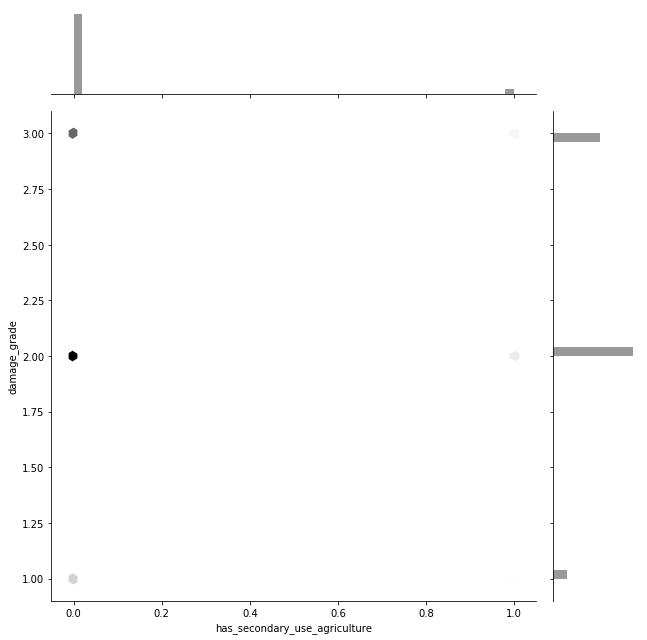

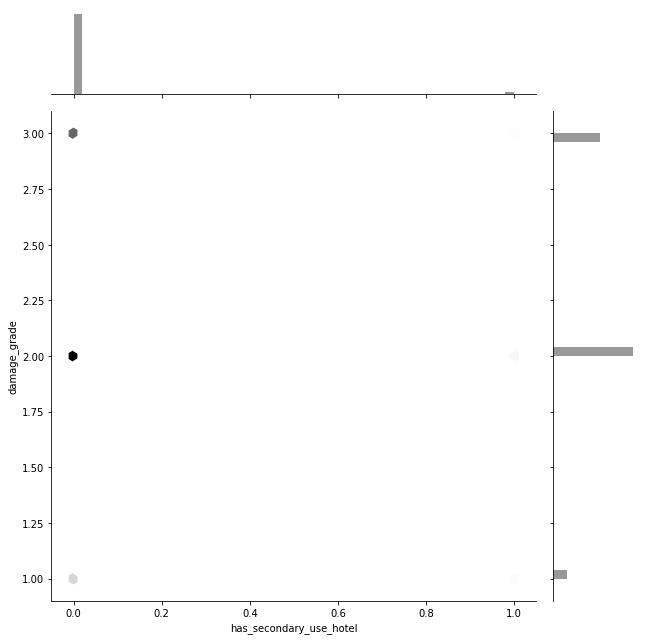

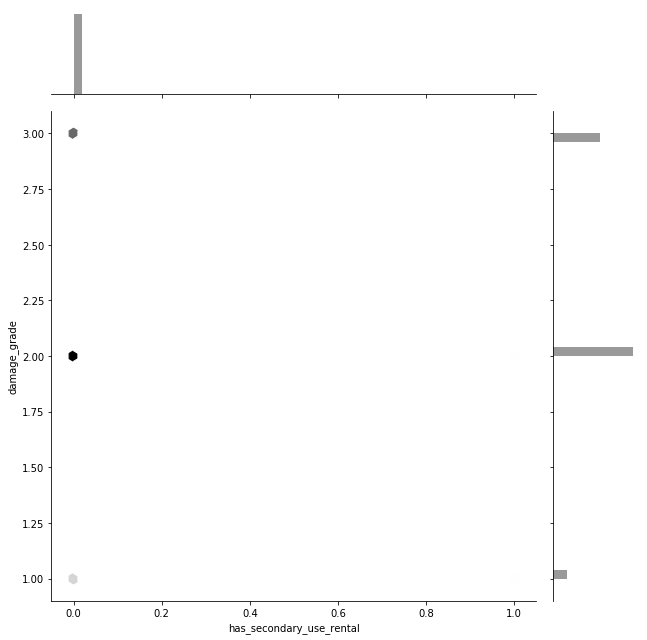

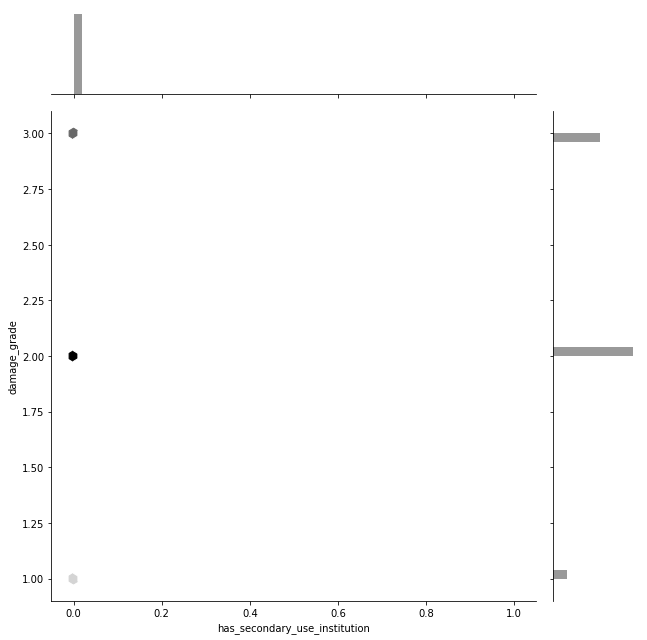

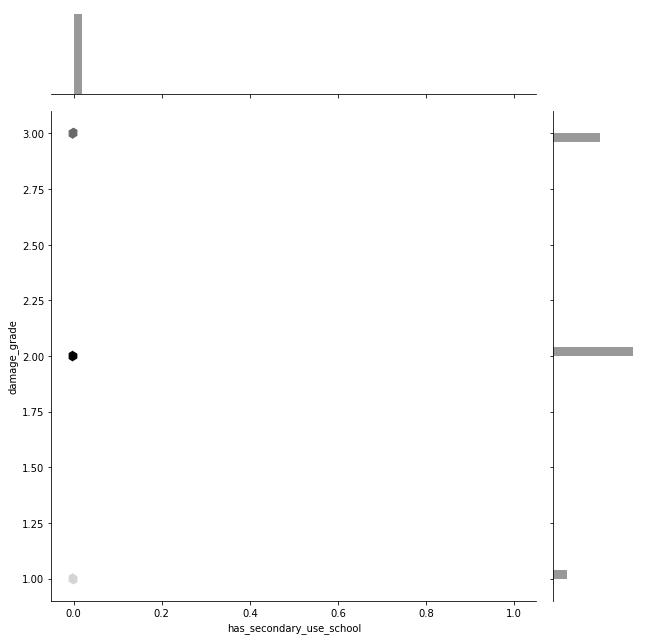

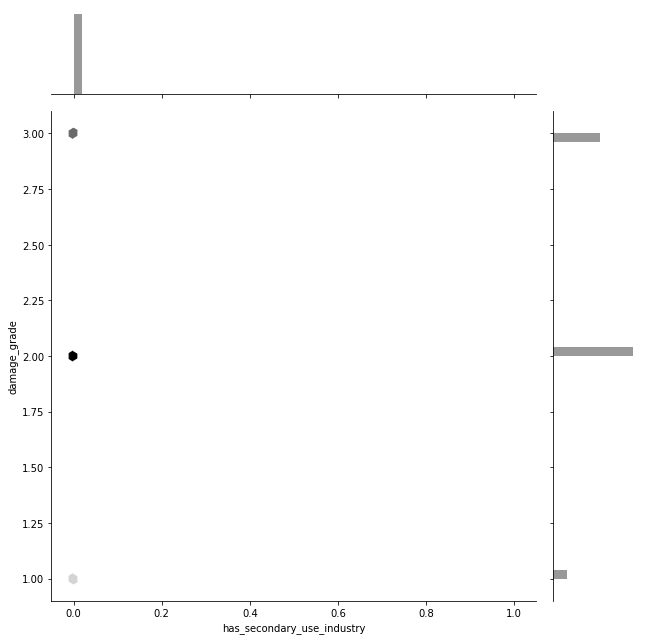

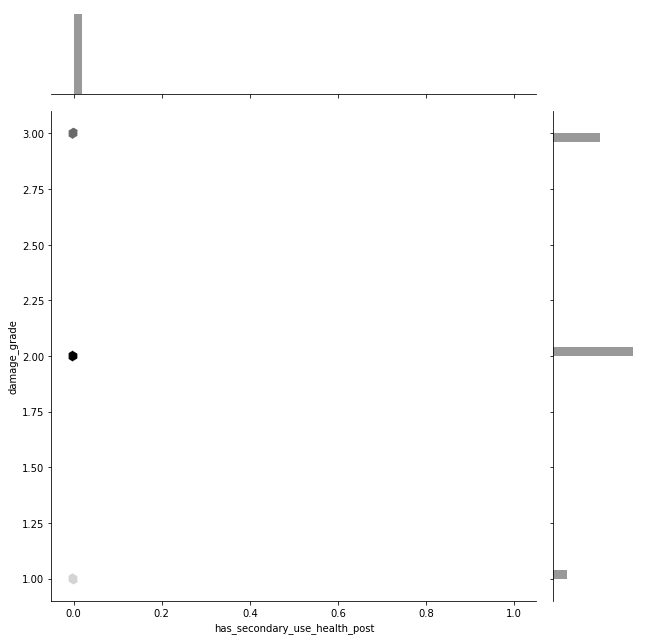

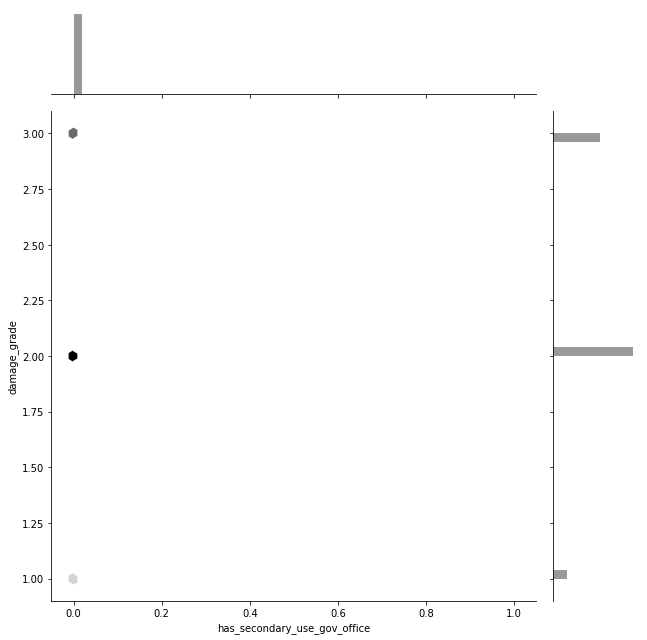

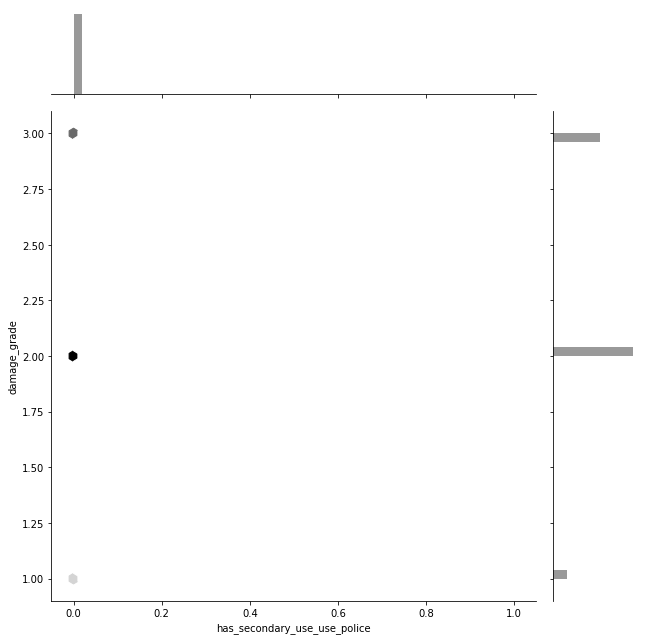

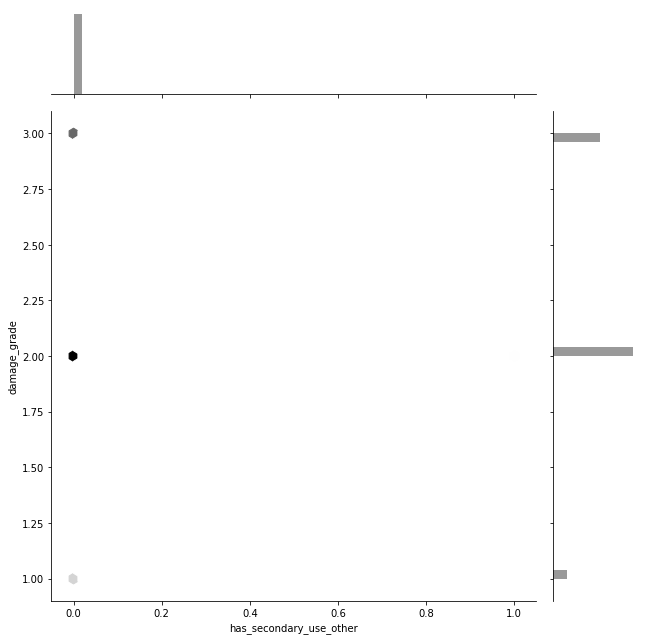

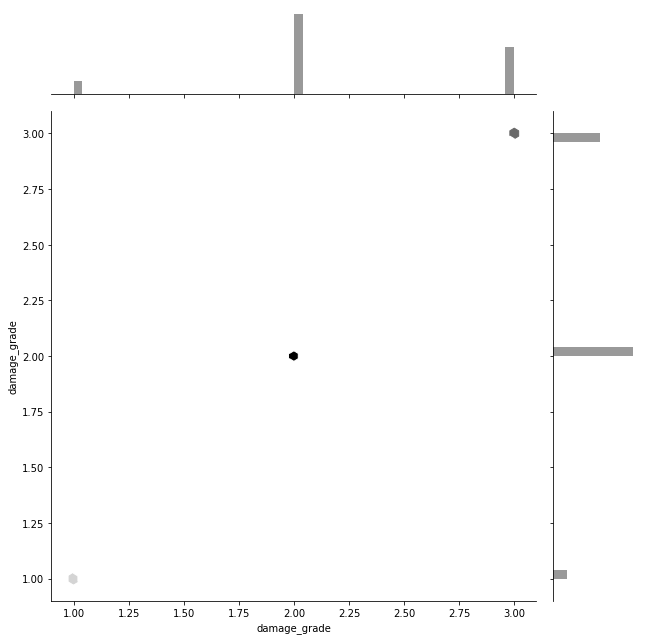

In [10]:
for col in sns_data.columns:
    sns.jointplot(sns_data[col], sns_data['damage_grade'], kind="hex", color="k", height=9)

260601 259899 702


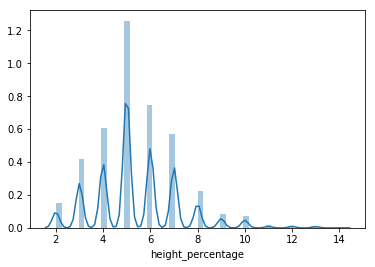

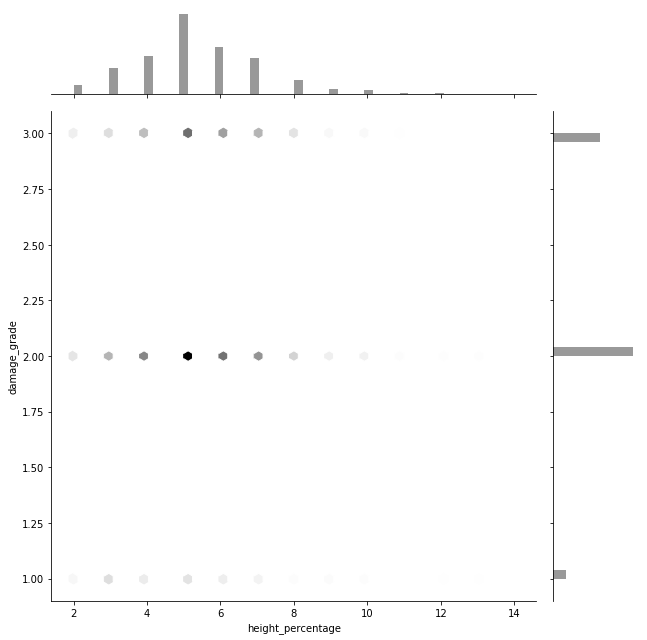

In [11]:
sns_data=train_values[['height_percentage']].join(train_labels)
l1=len(sns_data)
sns_data=sns_data[sns_data.height_percentage < 15]
l2=len(sns_data)
print(l1,l2,l1-l2)
sns.distplot(sns_data['height_percentage'])
sns.jointplot(sns_data['height_percentage'], sns_data['damage_grade'], kind="hex", color="k", height=9)